# NRE1 - Assignment 2 - *revised version*

**Note**: This notebook is a graded assignment with **25 points** to be achieved in total, plus an additional **5 bonus points**! You can work on this assignment alone or together in a group of two. 

<br>
<div class="alert alert-warning">
<br>
If you choose to work in a group of two, **remember to keep the group from the first assignment until the end of the semester**!
</div>

<div class="alert alert-warning">
<br>
As a reminder: Please upload your completed notebook to Moodle **strictly following** the naming convention:
<ul>
<li>``assignment2_XXXXXX.ipynb`` where XXXXXX corresponds to your student ID, or:
<li>``assignment2_XXXXXX_YYYYYY.ipynb`` if you submit together (both student ID's)
</ul>
**Please upload the assignment on Moodle**
</div>

Before you submit this assignment, make sure everything runs as you expect it to.  
* **restart the kernel** (in the menubar, select Kernel -> Restart)
* **run all cells** (in the menubar, select Cell -> Run All)

Make sure to fill in any place that says:
```python
# YOUR CODE HERE
```
or

    YOUR ANSWER HERE

You need to delete every line of code that says:
```python
raise NotImplementedError()
```

<br>
<div class="alert-danger">
<br><center>Remember: copying code form someone else and pretending it is your own is **serious scientific fraud**!</center>
<br>
</div>

Please fill in your name (and of your fellow student, if you submit together), and according matriculation number below. If you are more than one student, separate by a comma **,**

In [ ]:
NAME = ""
MATNUM = ""

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from pandas import set_option

## Preliminaries

In this assignment notebook, you will **apply your new knowledge about functions and plot generation** together with the **efficient numerical methods** implemented in the `numpy` module to solve multivariate regression problems. An understanding of these methods will prepare us at the same time for a deeper understanding of fundamental geostatistical concepts.

## Task 1 (15 pts): Multivariate regression with known mean

In the following tasks, you will implement multivariate linear regression as a function (*MLR-function*), based on the equations discussed in the lecture. 

For testing the MLR-function later, we need some data. You already generated data in the simple linear regression example shown before. Below, we generate a synthetic dataset comprising 1000 samples for three variables `X`, `Y`, and `Z` with a given covariance (here 0.7).



In [2]:
# Generate synthetic data with a given random number seed
np.random.seed(42)
# We will first keep the mean values at zero:
means = 0.
# Here, we define the covariances - feel free to experiment with different values to determine their effect:
covs = 0.7
n = 3 # number of variables
n_samples = 1000

cov_matrix = np.ones((n,n)) * covs * (np.ones((n,n)) - np.eye(n)) + np.eye(n)
print(cov_matrix)

[[ 1.   0.7  0.7]
 [ 0.7  1.   0.7]
 [ 0.7  0.7  1. ]]


In the next step, we now use this defined covariance function to generate random samples from a multivariate gaussian distribution - i.e.: we generate samples that follow the covariance matrix defined above:

In [3]:
samples_mvar = np.random.multivariate_normal(np.ones(n) * means, cov_matrix, size=(n_samples))
X = samples_mvar[:,0]
Y = samples_mvar[:,1]
Z = samples_mvar[:,2]

In a real case study, we would have received this data from an experment, for example. A first step useful step when investigating data is to generate plots for a visual interpretation.

<div class="alert alert-info">
<hr>
**Your task (5 pts):** Generate a series of scatter plots from the dataset for visual inspection of correlation between the three different variables. **Hint:** you can group the plots as `subplots` with `matplotlib`.
<hr>
</div>



In [ ]:
# YOUR CODE HERE

Obviously (since we assigned the covariance value), we see that the single variables are correlated. Hence, we can use this dataset for testing a multivariate regression function.  


<div class="alert alert-info">
<hr>
**Your task (10 pts):** Complete the function `multivar_reg_zero_mean()` which estimates a value for `z0` based on positions `x0`and `y0` in our 3D dataset comprising `X`, `Y`, and `Z`, assuming that the mean value is known and equal to zero. 
<p>
For full points, the function should be able to also take arrays of multiple x0 and y0 as an input!</p>
<hr>
</div>

**Hint**:
In the case of known and zero mean, the prediction function simply becomes 

$$z_0^* = \sum_{i=1}^N a_i z_i$$ 

Adapted to our specific case above with two explanatory variables $x_0$ and $y_0$, this equation becomes:

$$z_0^* = a_0 x_0 + a_1 y_0$$

and the remaining task is to obtain estimates for $a_0$ and $a_1$. These coefficients can be obtained by solving the matrix equation we discussed in the lecture: 

$$V \boldsymbol{a} = \boldsymbol{v_0}$$

Note that the matrix $V$ is only the estimated variance-covariance matrix for the explanatory variables (in our case: only $x$ and $y$), and that the vector $\boldsymbol{v_0}$ contains the covariances between the explanatory variables and the evaluated variable, in our case: $cov(x,z)$ and $cov(y,z)$.

**One more hint**: you have to *estimate* $V$ and $\boldsymbol{v_0}$ from the data sets $X,Y,Z$ - you *can not* use the *theoretical* covariance values used to generate the samples in Task 1! In reality, these are not known - and our estimate deviates (recall the exercise on estimating covariance values, June 4).


In [98]:
def multivar_reg_zero_mean(X, Y, Z, x0, y0):
    """
    Function to perform multivariate regression to estimate a value z0 at position (x0,y0)
    based on sampled values X, Y, Z, assuming zero mean values
    
    Input arguments:
    - X: array with samples x-values
    - Y: array with samples y-values
    - Z: array with samples z-values
    - x0, y0: position for estimates (note: should also work for arrays of x0 and y0!)
    
    Returns:
    z0: estimated value for the given position    
    """
    # YOUR CODE HERE
    V = np.cov(X,Y)
    v0 = np.array([np.cov(X,Z)[0,1],np.cov(Y,Z)[0,1]])
    a0,a1 = np.linalg.solve(V,v0)
    z0 = a0*x0 +a1*y0
    #print(np.allclose(np.dot(V, np.array([a0,a1])), v0))
    #print(np.dot(V, np.array([a0,a1])), v0)
    return z0

In [99]:
x0=np.array([1,2,3])
y0=np.array([3,4,3])

In [101]:
multivar_reg_zero_mean(X,Y,Z,x0,y0)

array([ -4.78366704e-01,  -1.10103945e+00,  -1.01025230e+00,
        -3.68423194e-01,  -8.86739694e-02,   2.66462900e-01,
         3.01427560e-01,   3.94919736e-01,   5.89513459e-01,
        -2.86495576e-01,   6.18639954e-01,   1.04397224e+00,
        -1.30973137e-01,  -1.00923761e-01,   2.87690218e-01,
         3.17925175e-01,  -4.69787346e-01,   1.21978157e-01,
        -5.35271439e-01,   1.05123068e-01,   5.06606153e-01,
         7.40825934e-01,   9.13618969e-02,   2.65906394e-01,
         5.85077667e-01,  -5.46875722e-01,  -2.21473080e-01,
        -4.00892266e-02,   4.01146397e-01,  -3.71458494e-01,
         1.30806838e-01,   4.31982302e-01,  -1.92901598e-01,
         1.03341285e-01,   2.00111808e-01,  -1.44225814e-01,
         1.04824460e-01,  -3.60664280e-01,   1.74948626e-01,
         8.46665980e-01,  -8.85394999e-01,   7.39362799e-01,
         6.56115304e-01,   2.10813974e-01,   9.67002083e-01,
        -1.15909754e+00,  -7.48295428e-01,  -1.13887550e+00,
         7.76095781e-02,

In [ ]:
# DO NOT ALTER THIS CELL, USED FOR AUTOGRADING


## Task 2 (5 pts): Consideration of mean values

In the previous task, we considered the mean value as known and equal to zero. In the next task, we will make the multivariate regression function a bit more flexible by allowing for non-zero means. In order to test the function, we will first generate new samples with non-zero means:

In [21]:
# Generate synthetic data with a given random number seed
np.random.seed(31415)
# We will first keep the mean values at zero:
means = np.array([2.,5.,3.])
# Here, we define the covariances - feel free to experiment with different values to determine their effect:
covs = 0.7
n = 3 # number of variables
n_samples = 1000

cov_matrix = np.ones((n,n)) * covs * (np.ones((n,n)) - np.eye(n)) + np.eye(n)
samples_mvar = np.random.multivariate_normal(means, cov_matrix, size=(n_samples))
X2 = samples_mvar[:,0]
Y2 = samples_mvar[:,1]
Z2 = samples_mvar[:,2]

<div class="alert alert-info">
<hr>
**Your task (4 pts):** Complete the function `multivar_reg()` to consider non-zero mean values
<hr>
</div>

In [24]:
def multivar_reg(X, Y, Z, x0, y0):
    """
    Function to perform multivariate regression to estimate a value z0 at position (x0,y0)
    based on sampled values X, Y, Z, considering non-zero means
    
    Input arguments:
    - X: array with samples x-values
    - Y: array with samples y-values
    - Z: array with samples z-values
    - x0, y0: position for estimates
    
    Returns:
    z0: estimated value for the given position    
    """
    # YOUR CODE HERE
    V = np.cov(X,Y)
    v0 = np.array([np.cov(X2-np.mean(X2),Z2-np.mean(Z2))[0,1],
                   np.cov(Y2-np.mean(Y2),Z2-np.mean(Z2))[0,1]])
    a0,a1 = np.linalg.solve(V,v0)
    z0 = a0*x0 +a1*y0
    return z0

In [35]:
multivar_reg(X,Y,Z,x0,y0)

array([ 1.79310537,  2.64976971,  2.56999302])

In [ ]:
# DO NOT ALTER THIS CELL, USED FOR AUTOGRADING



In [ ]:
# DO NOT ALTER THIS CELL, USED FOR AUTOGRADING



<div class="alert alert-info">
**Your Task (1pt)**: compare the results for the first case for the variables $X$, $Y$, $Z$, where we assume that the mean is known, to the second case, where we consider the *sample* mean values in the calculation: is there a significant difference? Where does it come from? How could it be reduced?
</div>

YOUR ANSWER HERE

## Task 3 (5 pts + 5 bonus pts):  Application to real data  

The generated multivariate regression function will now be tested using real data in form of geophysical well-logs.
As additional material to this assignment, you received a .csv file called `shrimplin.csv`. Within this file, you will find several columns, each representing measurements from geophysical well logs. 
This data is from the Council Grove gas reservoir in Southwest Kansas.  The Panoma Council Grove Field is predominantly a carbonate gas reservoir encompassing 2700 square miles in Southwestern Kansas.  

The dataset comprises five wireline log measurements. These are essentially continuous variables sampled at a half-foot sample rate.   
The log curves represent:  
1. [gamma ray](http://petrowiki.org/Gamma_ray_logs) (GR),  
2. [resistivity logging](http://petrowiki.org/Resistivity_and_spontaneous_%28SP%29_logging) (ILD_log10),  
3. [photoelectric effect](http://www.glossary.oilfield.slb.com/en/Terms/p/photoelectric_effect.aspx) (PE),   
4. [neutron-density porosity difference and average neutron-density porosity](http://petrowiki.org/Neutron_porosity_logs) (DeltaPHI and PHIND)

Below, we load the data and have a look at the first couple of values.

In [36]:
data = pd.read_csv('shrimplin.csv')
data.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4


In this example, we will try to evaluate if it is possible to estimate the PE-log values from ILD and PHIND as explanatory variables (consider, for example, that PE is more difficult to measure and you want to estimtate if it is actually worth measuring).

As a first step, create a plot to inspect the data:

<div class="alert alert-info">
**Your task (2 pts)**: Create a plot of the data:
</div>

Text(0.5,1,'PE')

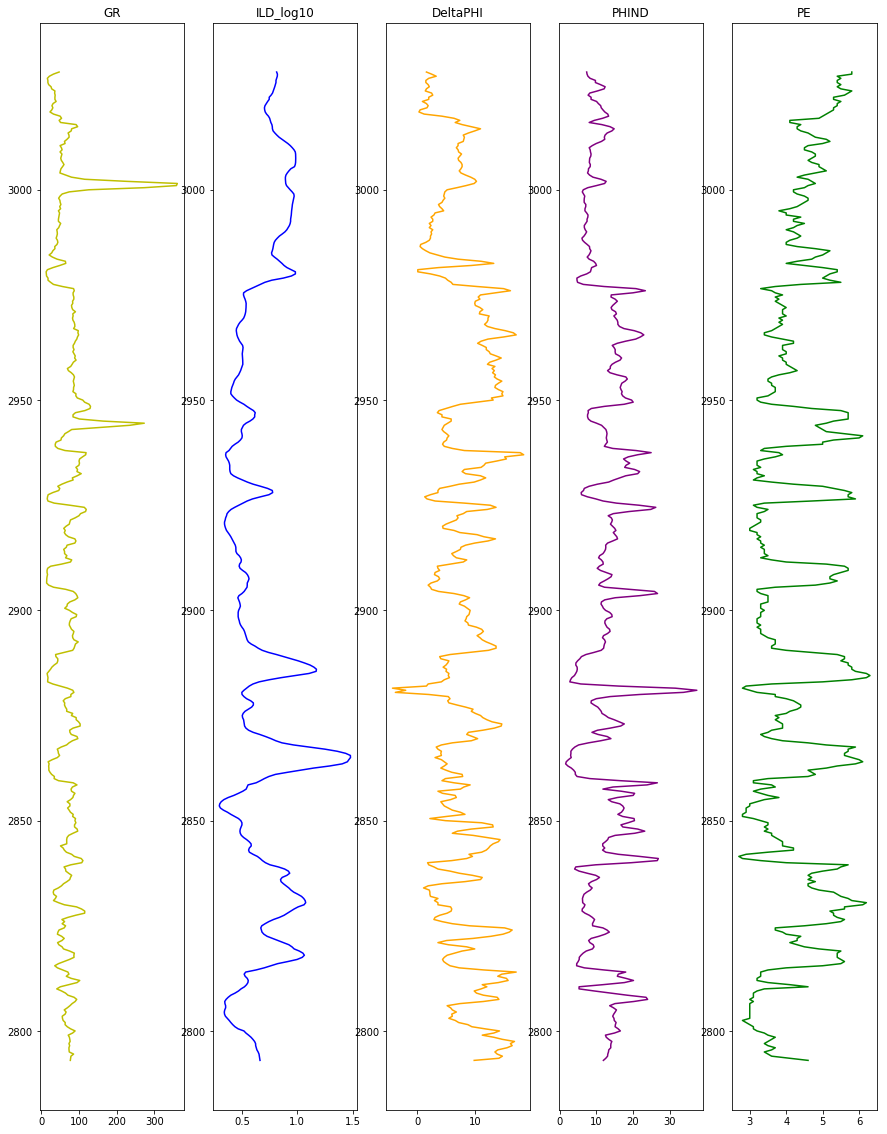

In [73]:
# Create plots to visualize data:
fig, ax = plt.subplots(1,5,figsize=(15,20))

ax[0].plot(data['GR'],data['Depth'],color='y')
ax[0].set_title('GR')

ax[1].plot(data['ILD_log10'],data['Depth'],color='b')
ax[1].set_title('ILD_log10')

ax[2].plot(data['DeltaPHI'],data['Depth'], color='orange')
ax[2].set_title('DeltaPHI')

ax[3].plot(data['PHIND'],data['Depth'], color='purple')
ax[3].set_title('PHIND')

ax[4].plot(data['PE'],data['Depth'], color='g')
ax[4].set_title('PE')
# YOUR CODE HERE

Clearly, now, the data is not anymore as well distributed as in the ideal test cases above - but we can still clearly identify trends in all three cross-plots. Specifically, it seems that the photoelectric effect (PE) is linearly increasing for higher ILD values, and decreasing for higher PHIND values.

<div class="alert alert-info">
**Your task (1 pt)**: Test if it is possible to determine PE from ILD and PHIND values:
</div>

In [81]:
PE_reg = multivar_reg(data['ILD_log10'],data['PHIND'],
                      data['PE'],data['ILD_log10'],data['PHIND'])

resid = (PE_reg/10 - data['PE'])

Text(0.5,1,'resid')

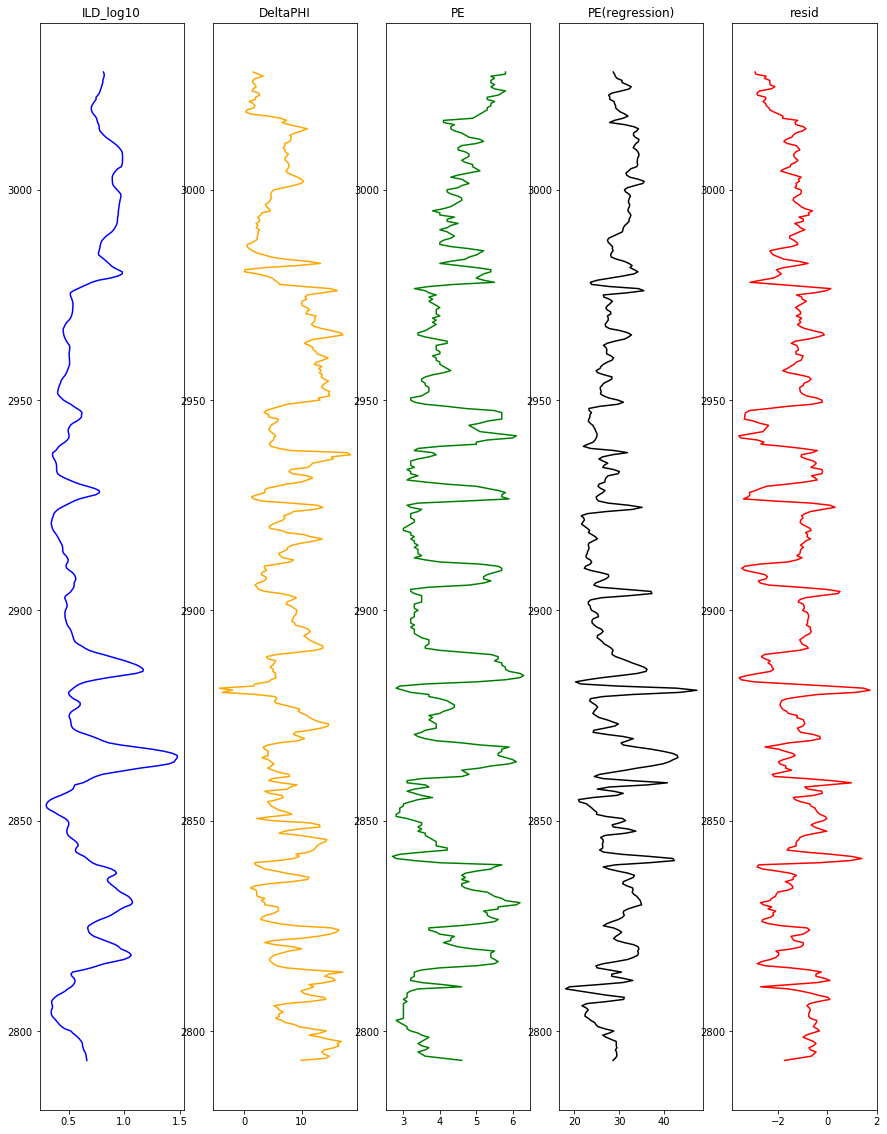

In [82]:
fig, ax = plt.subplots(1,5,figsize=(15,20))

ax[0].plot(data['ILD_log10'],data['Depth'],color='b')
ax[0].set_title('ILD_log10')

ax[1].plot(data['DeltaPHI'],data['Depth'],color='orange')
ax[1].set_title('DeltaPHI')

ax[2].plot(data['PE'],data['Depth'], color='g')
ax[2].set_title('PE')

ax[3].plot(PE_reg,data['Depth'],color='k')
ax[3].set_title('PE(regression)')

ax[4].plot(resid,data['Depth'], color='r')
ax[4].set_title('resid')

In [ ]:
# DO NOT ALTER THIS CELL, USED FOR AUTOGRADING



How can you test if the obtained results make sense?

<div class="alert alert-info">
**Your task (2 pts + 5 bonus pts)**: Create plots to evaluate if the regression results allow you to explain PE from the other two variables. This can include the analysis of residuals, or also plots in 3-D, including the obtained regression plane.
<p>I am giving **up to 5 bonus points** for creative and detailed analyses of the regression results!</p>
</div>

In [ ]:
# YOUR CODE HERE


